In [1]:
import sys

assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Question 1. 
Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image?

In [4]:
img = cv.imread('dog1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
equlizer = cv.equalizeHist(gray)
equlizer2 = cv.equalizeHist(equlizer)
cv.imshow('original', img)
cv.imshow('first_equ_image', equlizer)
cv.imshow('second_equ_image', equlizer2)

#There is no any difference between these two images.

cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

Load the image 'electronic.jfif'. Then,

A)  Experiment with different kernel size. Which kernel size is the most appropriate?

B)  Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.

C)  Try Laplacian of Gaussian


In [5]:
#A)Experiment with different kernel size. Which kernel size is the most appropriate?
img = cv.imread('electronic.jfif', 0)

img_blur = cv.GaussianBlur(img, (5, 5), 0)

for i in range(1, 6, 2): #According to this range kernal size 3 is better compared to 1 and 5
    sobelx = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = i)
    sobelx_8u = np.uint8(np.absolute(sobelx))
    cv.imshow('Sobel x' + str(i), sobelx_8u)

    
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
#B) Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.

sobelxy = cv.Sobel(img, cv.CV_64F, 1, 1, ksize = 3)
sobelxy_8u = np.uint8(np.absolute(sobelxy))
sobelxy_blur = cv.Sobel(img_blur, cv.CV_64F, 1, 1, ksize = 3)
sobelxy_8u_blur = np.uint8(np.absolute(sobelxy_blur))

cv.imshow('Sobel not blurred', sobelxy_8u)
cv.imshow('Sobel blurred', sobelxy_8u_blur)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
#C) Try Laplacian of Gaussian
laplacian_blur = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_blur = np.uint8(np.absolute(laplacian_blur))

cv.imshow('results', laplacian_blur)
cv.waitKey(0)
cv.destroyAllWindows()

Based on the 3 exercise conducted from (A) - (C), exercise C is more optimal compared to exercise A,B because laplacian blur is way more perfect in detecting the edges of the electronic appliances.

# Question 3
Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [8]:
img = cv.imread('pineapple.jfif', 0)

img_blur = cv.GaussianBlur(img, (3, 3), 0)

#Sobel
sobel = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3)
sobel_8u = np.uint8(np.absolute(sobel))

#Laplacian
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = np.uint8(np.absolute(laplacian))

#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_blur, -1, kernelx)
img_prewitty = cv.filter2D(img_blur, -1, kernely)

#scharr
img_scharr_x = cv.Scharr(img_blur, cv.CV_64F, 1, 0)
img_scharr_x = np.uint8(np.absolute(img_scharr_x))
img_scharr_y = cv.Scharr(img_blur, cv.CV_64F, 0, 1)
img_scharr_y = np.uint8(np.absolute(img_scharr_y))
img_scharr = cv.bitwise_or(img_scharr_x,img_scharr_y) 

#canny
img_canny = cv.Canny(img_blur, 100, 200)

cv.imshow('sobel_results', sobel_8u)
cv.imshow('laplacian_results', laplacian)
cv.imshow('prewitt_results', img_prewittx + img_prewitty)
cv.imshow('scharr_results', img_scharr)
cv.imshow('canny_results', img_canny)
cv.waitKey(0)
cv.destroyAllWindows()

Canny edge detection is perfect in edge detection meanwhile laplacian dint do a perfect job in edge detection. 

# Question 4
Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

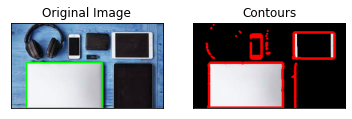

In [9]:
img = cv.imread('electronic.jfif')

lower = [160, 160, 160]
upper = [255, 255, 255]

lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

mask = cv.inRange(img, lower, upper)
output = cv.bitwise_and(img, img, mask = mask)

ret,thresh = cv.threshold(mask, 40, 255, 0)

contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

if len(contours) != 0:
# draw in blue the contours that were founded
    cv.drawContours(output, contours, -1, 255, 3)


    c = max(contours, key = cv.contourArea)
    x, y, w, h = cv.boundingRect(c)


    cv.rectangle(img,(x,y),(x + w, y + h), (0, 255, 0), 2)



plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output, cmap = 'gray')
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.show()


